# Explore here

In [138]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import *
from sklearn.multioutput import MultiOutputRegressor, RegressorChain

data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/alternative-time-series-project/main/sales.csv",sep=',')
data.to_csv('/workspaces/serie-tempalt-joeld/data/raw/sales.csv',index=False)
data.head()

,date,sales
0,2022-09-03 17:10:08.079328,55.292157
1,2022-09-04 17:10:08.079328,53.803211
2,2022-09-05 17:10:08.079328,58.141693
3,2022-09-06 17:10:08.079328,64.530899
4,2022-09-07 17:10:08.079328,66.013633


In [139]:
data.date = pd.to_datetime(data.date)

In [140]:
print(data.date.min(),data.date.max())
print((data.date.max()-data.date.min()).days)
print(len(set(data.date)))

2022-09-03 17:10:08.079328 2023-09-03 17:10:08.079328
365
366


como podemos ver aqui la resta me da 365 dias aunque luego de investigalo entre estas fechas has 366  como la longitud indica esto puede pasar debido a que la ultima fecha no esta considerando el dia completo utilizaremos timedelta para asegurarnos que utiliza el dia completo y que no se trata de algun otro problema para que no exista otro problema vamos a quedarnos unicamente con las fechas sin tener en cuenta las horas 

In [141]:
data['date'] = data['date'].dt.date

In [142]:
# Ajustar la fecha máxima para incluir todo el día
fecha_max = data['date'].max() + pd.Timedelta(days=1) - pd.Timedelta(seconds=1)
# Calcular la diferencia en días
diferencia_dias = (fecha_max - data['date'].min()).days

print("El número de días entre la fecha mínima y la fecha máxima es:", diferencia_dias)

El número de días entre la fecha mínima y la fecha máxima es: 366


In [143]:
data.set_index('date',inplace=True, drop=True)
data.head()

,sales
date,
2022-09-03,55.292157
2022-09-04,53.803211
2022-09-05,58.141693
2022-09-06,64.530899
2022-09-07,66.013633


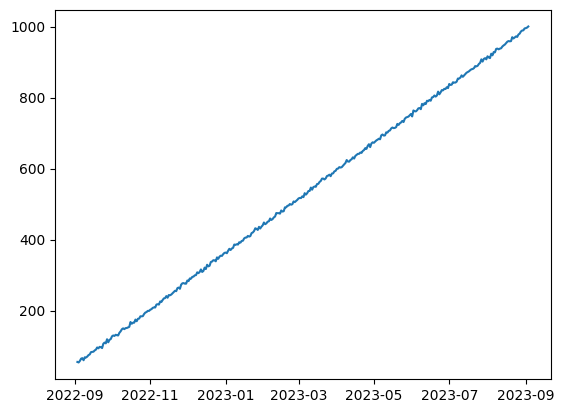

In [144]:
plt.plot(data)

In [145]:
df_train = data.iloc[:-30]
df_test = data.iloc[-30:]

In [146]:
n = 4
XY_train = np.array([df_train[i:i+n].sales.values for i in range(len(df_train)) if len(df_train[i:i+n])==n])
X_train, y_train = XY_train[:,:-1], XY_train[:,-1]
XY_test = np.array([df_test[i:i+n].sales.values for i in range(len(df_test)) if len(df_test[i:i+n])==n])
X_test, y_test = XY_test[:,:-1], XY_test[:,-1]

In [147]:
# Crear el modelo de regresión lineal
X_train_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_const)

# Ajustar el modelo a los datos
results = model.fit()

In [148]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.051e+05
Date:                Tue, 09 Apr 2024   Prob (F-statistic):               0.00
Time:                        15:33:15   Log-Likelihood:                -876.58
No. Observations:                 333   AIC:                             1761.
Df Residuals:                     329   BIC:                             1776.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.5210      0.468     11.804      0.0

In [149]:
def wf_validation(X_train, y_train, X_test, y_test):
  y_pred = []
  for i in range(len(y_test)):
    yhat = LinearRegression().fit(X_train,y_train).predict(np.array([X_test[i]]))[0]
    y_pred.append(yhat)
    X_train, y_train = np.vstack((X_train, X_test[i])), np.hstack((y_train, y_test[i]))
  return y_pred
y_pred = wf_validation(X_train, y_train, X_test, y_test)

In [150]:
print(r2_score(y_test,y_pred), mean_absolute_percentage_error(y_test,y_pred)*100, mean_absolute_error(y_test,y_pred))

0.9785670182670666 0.2556744696541142 2.4547423907375787


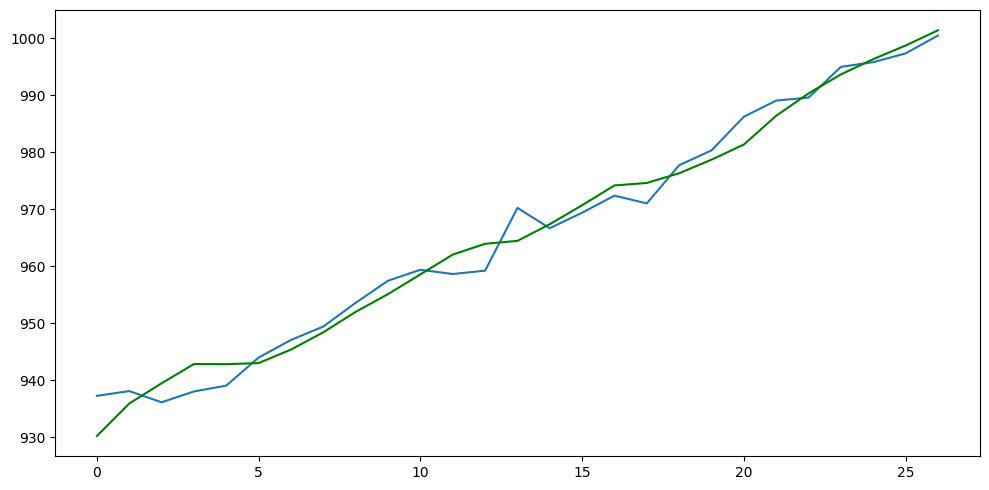

In [151]:
fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = y_test)
sns.lineplot(data = y_pred, c = "green")

plt.tight_layout()

plt.show()

In [152]:
in_len, out_len = 6, 2
n = in_len+out_len

XY_train = np.array([df_train[i:i+n].sales.values for i in range(len(df_train)) if len(df_train[i:i+n])==n])
X_train, y_train = XY_train[:,:in_len], XY_train[:,-out_len:]
XY_test = np.array([df_test[i:i+n].sales.values for i in range(len(df_test)) if len(df_test[i:i+n])==n])
X_test, y_test = XY_test[:,:in_len], XY_test[:,-out_len:]

In [159]:
y_test[:, 0]

array([938.07347347, 939.09749382, 944.01969786, 947.10413899,
       949.45386457, 953.6207965 , 957.48898915, 959.40512775,
       958.66647234, 959.24826941, 970.25797911, 966.69877573,
       969.41298221, 972.4090348 , 971.04613382, 977.74416018,
       980.34185448, 986.24463654, 989.08167282, 989.60035376,
       994.98732594, 995.8144155 , 997.35021394])

In [154]:
y_pred_multi

array([[ 940.92091395,  941.95594008],
       [ 943.30145871,  945.81348778],
       [ 945.1857493 ,  947.32258694],
       [ 947.62178397,  951.02614078],
       [ 949.22673503,  952.84256307],
       [ 951.43213897,  954.10253819],
       [ 954.17009091,  956.88620634],
       [ 957.46438021,  959.90923655],
       [ 960.98254469,  963.45880491],
       [ 963.56705787,  965.81065025],
       [ 965.50999613,  967.67535385],
       [ 968.26372718,  971.48275834],
       [ 971.12071494,  974.33734825],
       [ 973.291838  ,  975.55930565],
       [ 974.86029889,  977.72249514],
       [ 977.61297331,  979.3948263 ],
       [ 979.96571007,  983.50486988],
       [ 981.77007693,  984.91421951],
       [ 985.21102357,  987.92872265],
       [ 988.38150651,  991.40353694],
       [ 991.73178955,  993.409189  ],
       [ 995.26216689,  997.70057959],
       [ 998.44432333, 1000.83619666]])

In [155]:
modelo = MultiOutputRegressor(LinearRegression()).fit(X_train, y_train)
y_pred_multi = modelo.predict(X_test)

In [156]:
print(r2_score(y_test[:,0],y_pred_multi[:,0]), mean_absolute_percentage_error(y_test[:,0],y_pred_multi[:,0])*100, mean_absolute_error(y_test[:,0],y_pred_multi[:,0]))

0.9783576241144251 0.2281240668933878 2.205926637012819


In [170]:
print(r2_score(y_test[:,1],y_pred_multi[:,1]), mean_absolute_percentage_error(y_test[:,1],y_pred_multi[:,1])*100, mean_absolute_error(y_test[:,1],y_pred_multi[:,1]))

0.9802631602419158 0.2184565916241995 2.119798776334545


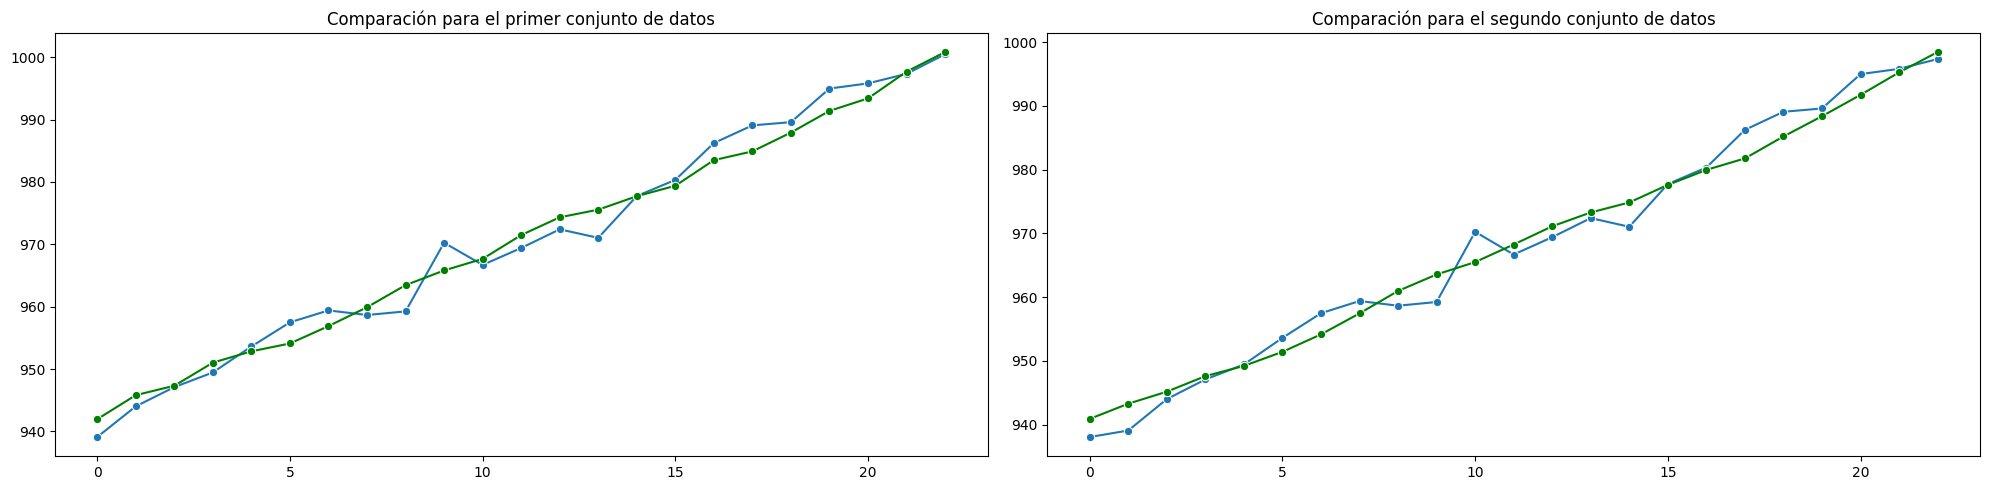

In [169]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5))

# Graficar y_test y y_pred_multi en la primera subparcela
sns.lineplot(data=y_test[:, 1], marker='o', ax=axes[0])
sns.lineplot(data=y_pred_multi[:, 1], color="green", marker='o', ax=axes[0])
axes[0].set_title('Comparación para el primer conjunto de datos')

# Graficar y_test y y_pred_multi en la segunda subparcela
sns.lineplot(data=y_test[:, 0], marker='o', ax=axes[1])
sns.lineplot(data=y_pred_multi[:, 0], color="green", marker='o', ax=axes[1])
axes[1].set_title('Comparación para el segundo conjunto de datos')

# Ajustar el diseño y mostrar la figura
plt.tight_layout()
plt.show()